# LSTM

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


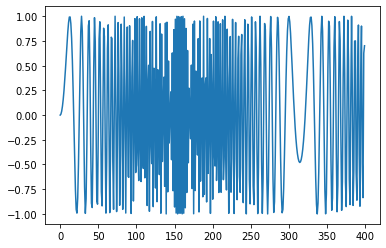

In [3]:
series = np.sin((0.1 * np.arange(400)) ** 2)
plt.plot(series)
plt.show()

T = 10
D = 1
X = []
y = []
for t in range(len(series) - T):
    X.append(series[t:t + T])
    y.append(series[t + T])
X = np.asarray(X).reshape(-1, T, D)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 2s 12ms/sample - loss: 0.5424 - val_loss: 0.5524
Epoch 2/200
195/195 [==============================] - 0s 167us/sample - loss: 0.5003 - val_loss: 0.5812
Epoch 3/200
195/195 [==============================] - 0s 161us/sample - loss: 0.5215 - val_loss: 0.5681
Epoch 4/200
195/195 [==============================] - 0s 151us/sample - loss: 0.4434 - val_loss: 0.4800
Epoch 5/200
195/195 [==============================] - 0s 149us/sample - loss: 0.3262 - val_loss: 0.4688
Epoch 6/200
195/195 [==============================] - 0s 150us/sample - loss: 0.2318 - val_loss: 0.3251
Epoch 7/200
195/195 [==============================] - 0s 150us/sample - loss: 0.1775 - val_loss: 0.3189
Epoch 8/200
195/195 [==============================] - 0s 149us/sample - loss: 0.1220 - val_loss: 0.2719
Epoch 9/200
195/195 [==============================] - 0s 148us/sample - loss: 0.1006 - val_loss: 0.1953
Epoch 10/2

Epoch 78/200
195/195 [==============================] - 0s 156us/sample - loss: 0.0035 - val_loss: 0.0723
Epoch 79/200
195/195 [==============================] - 0s 153us/sample - loss: 0.0037 - val_loss: 0.0758
Epoch 80/200
195/195 [==============================] - 0s 150us/sample - loss: 0.0023 - val_loss: 0.0704
Epoch 81/200
195/195 [==============================] - 0s 150us/sample - loss: 0.0017 - val_loss: 0.0652
Epoch 82/200
195/195 [==============================] - 0s 158us/sample - loss: 0.0016 - val_loss: 0.0698
Epoch 83/200
195/195 [==============================] - 0s 153us/sample - loss: 0.0014 - val_loss: 0.0680
Epoch 84/200
195/195 [==============================] - 0s 140us/sample - loss: 0.0011 - val_loss: 0.0734
Epoch 85/200
195/195 [==============================] - 0s 151us/sample - loss: 0.0012 - val_loss: 0.0707
Epoch 86/200
195/195 [==============================] - 0s 148us/sample - loss: 0.0014 - val_loss: 0.0704
Epoch 87/200
195/195 [========================

195/195 [==============================] - 0s 148us/sample - loss: 0.0030 - val_loss: 0.0566
Epoch 155/200
195/195 [==============================] - 0s 154us/sample - loss: 0.0035 - val_loss: 0.0723
Epoch 156/200
195/195 [==============================] - 0s 161us/sample - loss: 0.0031 - val_loss: 0.0638
Epoch 157/200
195/195 [==============================] - 0s 153us/sample - loss: 0.0039 - val_loss: 0.0648
Epoch 158/200
195/195 [==============================] - 0s 155us/sample - loss: 0.0027 - val_loss: 0.0726
Epoch 159/200
195/195 [==============================] - 0s 150us/sample - loss: 0.0021 - val_loss: 0.0628
Epoch 160/200
195/195 [==============================] - 0s 153us/sample - loss: 0.0022 - val_loss: 0.0791
Epoch 161/200
195/195 [==============================] - 0s 151us/sample - loss: 0.0035 - val_loss: 0.0687
Epoch 162/200
195/195 [==============================] - 0s 155us/sample - loss: 0.0042 - val_loss: 0.0743
Epoch 163/200
195/195 [============================

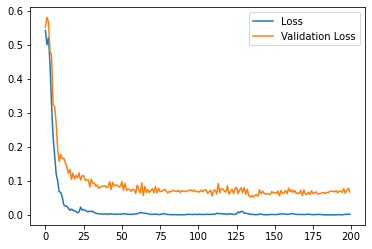

In [4]:
i = tf.keras.layers.Input(shape=(T, 1))
x = tf.keras.layers.LSTM(10)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.05),
              loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              batch_size=32,
              epochs=200)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

## One-step forecast

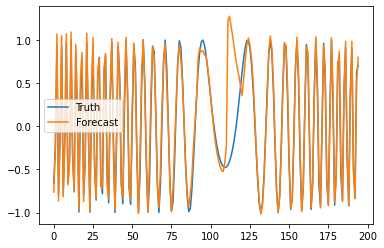

In [5]:
forecast = []
for i in range(len(y_test)):
    p = model.predict(X_test[i].reshape(1, T, D))[0, 0]
    forecast.append(p)

plt.plot(y_test, label='Truth')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

## Multi-step forecast

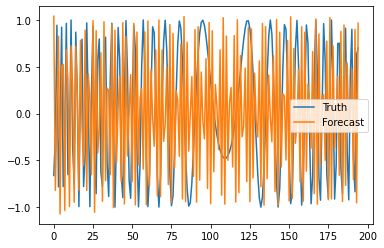

In [6]:
forecast = []
last_x = X_train[-1]
for i in range(len(y_test)):
    p = model.predict(last_x.reshape(1, T, D))[0, 0]
    forecast.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(y_test, label='Truth')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()